In [65]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [66]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [67]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [68]:
from utils import style, hdi, load_spectral_types
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [69]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [70]:
style(name="seaborn-notebook")

In [71]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [72]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [73]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries

array([[-0.019     ,  0.12713703],
       [ 0.12713703,  0.19024014],
       [ 0.19024014,  0.22021412],
       [ 0.22021412,  0.24230021],
       [ 0.24230021,  0.26004796],
       [ 0.26004796,  0.27621813],
       [ 0.27621813,  0.28923315],
       [ 0.28923315,  0.30106498],
       [ 0.30106498,  0.31329121],
       [ 0.31329121,  0.32512304],
       [ 0.32512304,  0.3353773 ],
       [ 0.3353773 ,  0.34523716],
       [ 0.34523716,  0.35509702],
       [ 0.35509702,  0.36535128],
       [ 0.36535128,  0.37402796]])

In [74]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05406852, 0.15868859, 0.20522713, 0.23125717, 0.25117408,
       0.26813305, 0.28272564, 0.29514907, 0.3071781 , 0.31920713,
       0.33025017, 0.34030723, 0.35016709, 0.36022415, 0.36968962])

In [75]:
mcmc_dir = join(root_data_dir, "MCMC-no", "no", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data'

In [76]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(-0.019)_(0.127).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.127)_(0.190).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.190)_(0.220).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.220)_(0.242).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.242)_(0.260).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.260)_(0.276).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.276)_(0.289).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.289)_(0.301).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.301)_(0.313).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.313)_(0.325).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.325)_(0.335).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.335)_(0.345).npy',
 '/

# Fungsi interpolasi

In [13]:
from utils import inv_simple, inv_standard, simple, standard

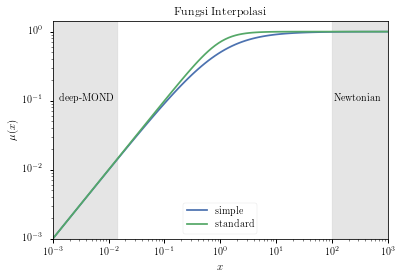

In [14]:
x = np.logspace(-3, 3, 100)
y_simple = simple(x)
y_standard = standard(x)

plt.plot(x, y_simple, label="simple")
plt.plot(x, y_standard, label="standard")
plt.axvspan(0.001, 0.015, alpha=0.2, color="gray")
plt.axvspan(100, 1000, alpha=0.2, color="gray")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$x$")
plt.ylabel(r"$\mu(x)$")
plt.title("Fungsi Interpolasi")
plt.xlim(x.min(), x.max())
plt.ylim(y_simple.min())
plt.text(0.0013, 0.1, r"deep-MOND", fontsize=10)
plt.text(110, 0.1, r"Newtonian", fontsize=10)
plt.legend()
# plt.savefig(join("img", "fungsi-interpolasi.pdf"), dpi=70)
plt.show()


## tes

In [77]:
index = 0
df = np.load(files[index])
df.shape

(2500, 320, 32)

In [78]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
length = rhob.shape[0]
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
rhoD = rhob - rhob0
# rhoD = rhob*(1/mu0-1)

# plot

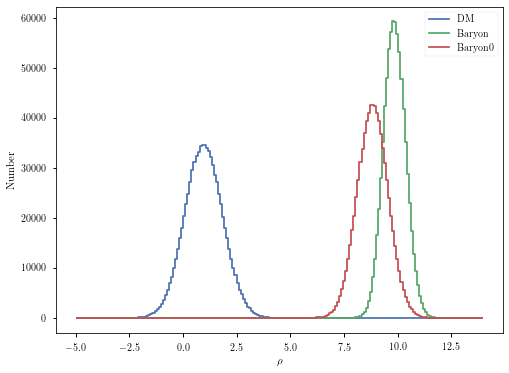

In [79]:
rho = np.linspace(-5, 14, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [80]:
rhoD_sample = np.random.choice(rhoD, size=10_000, replace=False)
rhoD_fit = norm.fit(rhoD_sample)
rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
rhob_fit = norm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=10_000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((1.022416994250096, 0.8648703213823955),
 (9.9018852294345, 0.508053704161517),
 (8.89055432505774, 0.7104271055986076))

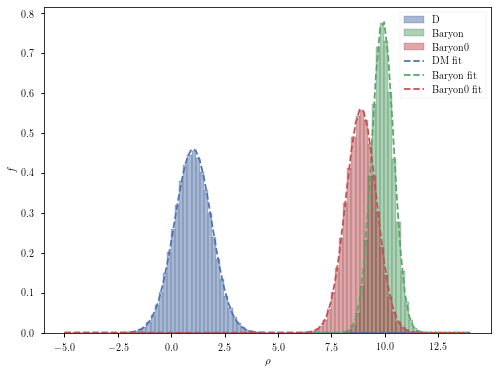

In [81]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='D', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, norm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoD_fit, rhob_fit, rhob0_fit

rhoD = 1.02 +0.86/-0.85
rhob = 9.90 +0.51/-0.50
rhob0 = 8.89 +0.71/-0.70


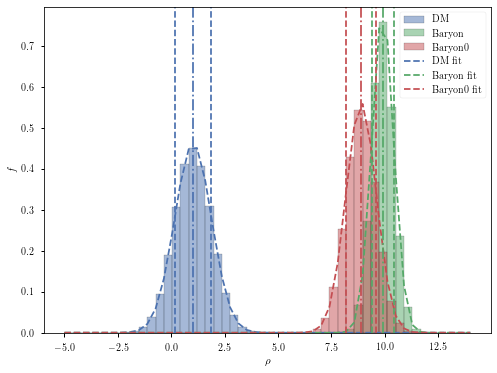

In [82]:
sigma = np.array([68, 90, 95])
alphas = 1 - sigma/100

hpd, modes = hdi(lambda x: norm.pdf(x, *rhoD_fit), -3, 7, alpha=alphas[0])
rhoD_mode = modes[0]
rhoD_low, rhoD_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob_fit), 5, 12.5, alpha=alphas[0])
rhob_mode = modes[0]
rhob_low, rhob_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), 5, 12.5, alpha=alphas[0])
rhob0_mode = modes[0]
rhob0_low, rhob0_high = hpd[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, norm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoD = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.70


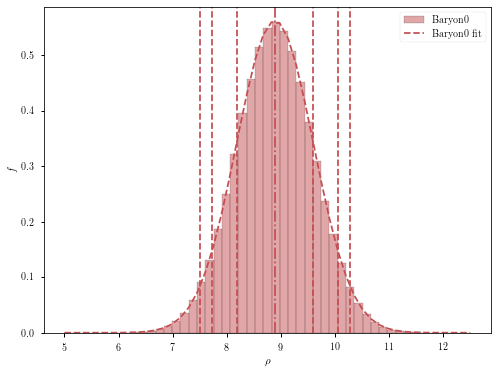

In [83]:
rhob0_low = []
rhob0_high = []
for i, alpha in enumerate(alphas):
    hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), low=5, high=12.5, alpha=alpha)
    low, high = hpd[0]
    rhob0_low.append(low)
    rhob0_high.append(high)
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for low, high in zip(rhob0_low, rhob0_high):
    ax.axvline(low, color='C2', ls='--')
    ax.axvline(high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [84]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []

for file in tqdm(files):
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoD = rhob - rhob0
    # print("fitting...")
    rhoD_sample = np.random.choice(rhoD, size=10_000, replace=False)
    rhoD_fit = norm.fit(rhoD_sample)
    rhoD_fits.append(rhoD_fit)
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = norm.fit(rhob_sample)
    # print("calculating HDI...")
    rhoD_err = []
    rhob_err = []
    rhoD_mode = None
    rhob_mode = None
    for i, alpha in enumerate(alphas):
        hpd, modes = hdi(lambda x: norm.pdf(x, *rhoD_fit), -5, 10, alpha=alpha)
        rhoDM_mode = modes[0]
        low, high = hpd[0]
        rhoD_err.append({'alpha': alpha, 'low': low, 'high': high})

        hpd, modes = hdi(lambda x: norm.pdf(x, *rhob_fit), 5, 15, alpha=alpha)
        rhob_mode = modes[0]
        low, high = hpd[0]
        rhob_err.append({'alpha': alpha, 'low': low, 'high': high})
    rhoD_errs.append(rhoD_err)
    rhob_errs.append(rhob_err)
    rhoD_modes.append(rhoDM_mode)
    rhob_modes.append(rhob_mode)

100%|██████████| 15/15 [00:01<00:00,  8.67it/s]


In [85]:
rhoD_fits

[(1.007006680963342, 0.8685019605639085),
 (0.756244168792984, 0.8933962721632325),
 (1.4875555693267233, 0.912468992138781),
 (1.7864516074321513, 0.9137456574227071),
 (1.8430349808552078, 0.9464233463905657),
 (1.4726312755929765, 0.9374724455667366),
 (1.1426536538104979, 0.9499531456394263),
 (1.006388230182195, 0.9494932248868803),
 (0.5881146958363013, 0.9468388336298895),
 (0.45449037974473294, 0.9629916775385012),
 (0.4470227540180734, 0.9565115995562923),
 (0.25476006820588926, 0.9675015731663312),
 (0.17675797814599753, 0.9695574657544748),
 (0.5056754762150367, 0.9750563258966908),
 (0.15015538409566942, 0.9801930277369411)]

(-1.0, 2.0)

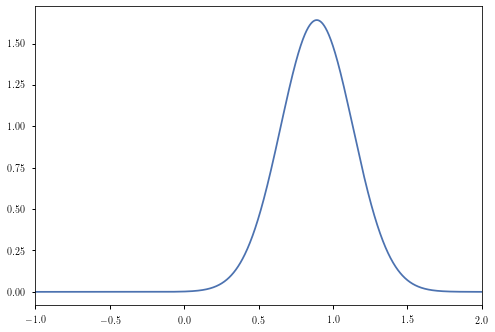

In [86]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoD = None
for p in rhoD_fits:
    if log_rhoD is None:
        log_rhoD = norm.logpdf(rho, *p)
    else:
        log_rhoD += norm.logpdf(rho, *p)
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# find area
area = np.trapz(rhoD_com, rho)
# normalize
rhoD_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoD')
ax.set_xlim(-1,2)

In [87]:
def normpdf(x, *args):
    A, other = args[0], args[1:]
    return A*norm.pdf(x, *other)

rhoD_com_fit, _ = curve_fit(normpdf, rho, rhoD_com, p0=[1, 1.0, 2.0])
rhoD_com_fit

array([1.        , 0.89075133, 0.24281769])

(-1.0, 5.0)

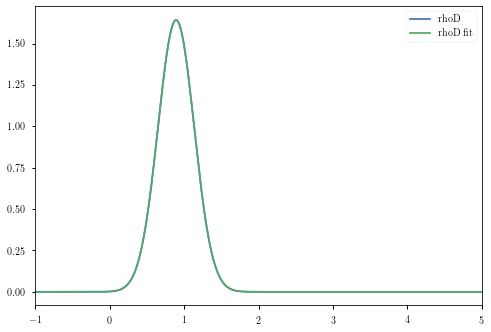

In [88]:
plt.plot(rho, rhoD_com, label='rhoD')
plt.plot(rho, normpdf(rho, *rhoD_com_fit), label='rhoD fit')
plt.legend()
plt.xlim(-1,5)

In [89]:
rhoD_com_err = []
rhoD_com_mode = None
for i, alpha in enumerate(alphas):
    hpd, modes = hdi(lambda x: normpdf(x, *rhoD_com_fit), low=-1, high=5, alpha=alpha)
    low, high = hpd[0]
    rhoD_com_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoD_com_mode = modes[0]
rhoD_com_mode, rhoD_com_err

(0.89,
 [{'sigma': array([68, 90, 95]), 'low': 0.65, 'high': 1.13},
  {'sigma': array([68, 90, 95]), 'low': 0.49, 'high': 1.29},
  {'sigma': array([68, 90, 95]), 'low': 0.41, 'high': 1.37}])

In [90]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [29]:
# for i in range(len(c)):
#     print(r"${}\leq c < {}$ & {:.02f} & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] \\".format(c1[i], c2[i], rhoDM_mode[i], rhoDM_low68[i], rhoDM_high68[i], rhoDM_low90[i], rhoDM_high90[i], rhoDM_low95[i], rhoDM_high95[i]))

In [30]:
c

array([0.05406852, 0.15868859, 0.20522713, 0.23125717, 0.25117408,
       0.26813305, 0.28272564, 0.29514907, 0.3071781 , 0.31920713,
       0.33025017, 0.34030723, 0.35016709, 0.36022415, 0.36968962])

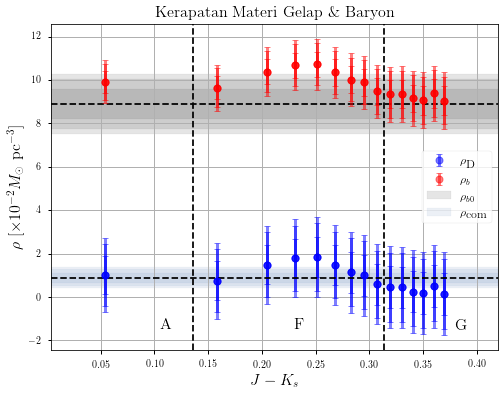

0.89

In [91]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoD_errs])
    high = np.array([err[i]['high'] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoD_com_ax = ax.fill_between(cs, rhoD_com_err[i]['low'], rhoD_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoD_com_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')

ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.105, -1.5, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -1.5, r'$\textup{F}$', fontsize=16)
ax.text(0.38, -1.5, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoD-no.pdf'), dpi=300)
plt.show()
rhoD_com_mode

# $a_0$

interpolation function
**Simple**
\begin{aligned}
    \mu(x) = \frac{x}{1+x}
\end{aligned}

**Standard**
\begin{aligned}
    \mu(x) = \sqrt{\frac{x^2}{1+x^2}}
\end{aligned}

## Inverse

**Simple**
\begin{equation*}
    x = \frac{\mu}{1-\mu}
\end{equation*}

**Standard**
\begin{equation*}
    x = \frac{\mu}{\sqrt{1-\mu^2}}
\end{equation*}

In [32]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
from scipy.integrate import simps
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [33]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [34]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [35]:
from utils import style, hdi, load_spectral_types
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [36]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [37]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [38]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))

In [39]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05406852, 0.15868859, 0.20522713, 0.23125717, 0.25117408,
       0.26813305, 0.28272564, 0.29514907, 0.3071781 , 0.31920713,
       0.33025017, 0.34030723, 0.35016709, 0.36022415, 0.36968962])

In [40]:
mcmc_dir = join(root_data_dir, "MCMC-no", "no", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data'

In [41]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(-0.019)_(0.127).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.127)_(0.190).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.190)_(0.220).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.220)_(0.242).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.242)_(0.260).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.260)_(0.276).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.276)_(0.289).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.289)_(0.301).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.301)_(0.313).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.313)_(0.325).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.325)_(0.335).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.335)_(0.345).npy',
 '/

In [42]:
index = 0
df = np.load(files[index])
df.shape

(2500, 320, 32)

In [43]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
length = rhob.shape[0]
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

In [44]:
rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
rhob_fit = norm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=10_000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

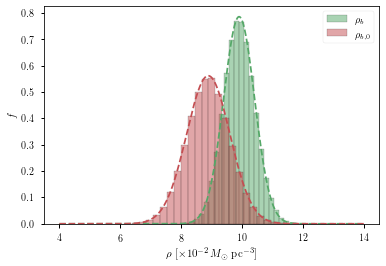

In [45]:
rho = np.linspace(4, 14, 1000)

fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(rhob, bins=30, density=True, label=r'$\rho_{b}$', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=30, density=True, label=r'$\rho_{b,0}$', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob_fit), color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), color='C2', ls='--')
ax.set_xlabel(r'$\rho$ [$\times 10^{-2} M_{\odot}$ pc$^{-3}$]')
ax.set_ylabel(r'$f$')
ax.legend()
fig.savefig(join('img', 'pdf-rhob.png'), dpi=300)
plt.show()

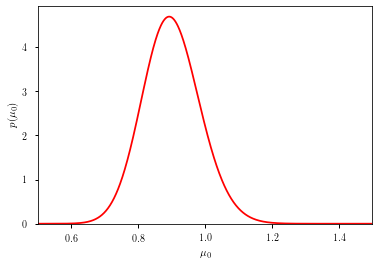

array([1.06612371, 0.83850886, 0.10546906])

In [46]:
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

mu0 = np.linspace(0.5, 1.5, 1000)
pdf_mu0_sample = np.sum(norm.pdf(mu0[:, None]*rho[None, :], *rhob0_fit)*norm.pdf(rho[None, :], *rhob_fit)*rho[None, :], axis=1)
area = np.trapz(pdf_mu0_sample, mu0)
pdf_mu0_sample /= area

mu0_fit, _ = curve_fit(skewnorm.pdf, mu0, pdf_mu0_sample, p0=[1, 1.0, 0.1])

# plt.scatter(mu0, pdf_mu0_sample)
plt.plot(mu0, skewnorm.pdf(mu0, *mu0_fit), c='r')
plt.xlabel(r'$\mu_0$')
plt.ylabel(r'$p(\mu_0)$')
plt.xlim(0.5, 1.5)
plt.ylim(0)
plt.savefig(join("img", "pdf-mu0.png"), dpi=300)
plt.show()

mu0_fit

In [47]:
def pdf_mu0(mu0, *mu0_fit):
    mu0 = np.atleast_1d(mu0)
    return skewnorm.pdf(mu0, *mu0_fit)

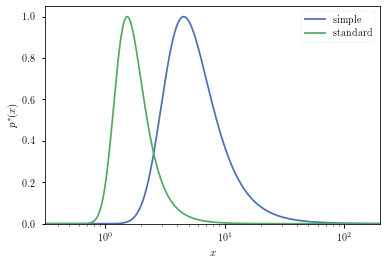

In [48]:
def pdf_x(x, mu_func, *mu0_fit):
    x = np.atleast_1d(x)
    mu0 = mu_func[0](x)
    val = pdf_mu0(mu0, *mu0_fit)*np.abs(mu_func[1](x))
    return val

def mu0_simple(x):
    return x/(1+x)
def mu0_deriv_simple(x):
    return 1/(1+x)**2

def mu0_standard(x):
    return x/np.sqrt(1+x**2)
def mu0_deriv_standard(x):
    return 1/np.power(1+x**2, 3/2)

mu0_simple_func = [mu0_simple, mu0_deriv_simple]
mu0_standard_func = [mu0_standard, mu0_deriv_standard]

x = np.logspace(-0.5, 2.3, 500)
pdf_x_sample = pdf_x(x, mu0_simple_func, *mu0_fit)
pdf_x_standard = pdf_x(x, mu0_standard_func, *mu0_fit)

plt.plot(x, pdf_x_sample/pdf_x_sample.max(), label='simple')
plt.plot(x, pdf_x_standard/pdf_x_standard.max(), label='standard')
plt.xlabel(r'$x$')
plt.ylabel(r'$p^{*}(x)$')
plt.xscale('log')
plt.xlim(x.min(), x.max())
plt.ylim(0)
plt.legend()
plt.savefig(join("img", "pdf-x.png"), dpi=300)
plt.show()

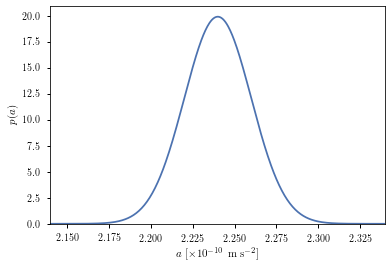

In [49]:
a_odot = 2.24
sigma_a_odot = 0.02
a = np.linspace(a_odot-sigma_a_odot*5, a_odot+sigma_a_odot*5, 500)
def pdf_a(a, *a_odot):
    return norm.pdf(a, *a_odot)

plt.plot(a, pdf_a(a, a_odot, sigma_a_odot))
plt.xlabel(r'$a$ [$\times 10^{-10}$ m s$^{-2}$]')
plt.ylabel(r'$p(a)$')
plt.xlim(a.min(), a.max())
plt.ylim(0)
plt.savefig(join("img", "pdf-a.png"), dpi=300)
plt.show()

In [50]:
sigma_a_odot/a_odot

0.008928571428571428

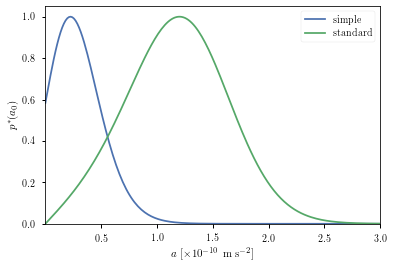

In [51]:
def pdf_a0(a0, mu0_func, *args):
    odot = args[0:2]
    mu0_fit = args[2:]
    a = np.linspace(odot[0]-odot[1]*5, odot[0]+odot[1]*5, 500)
    a0 = np.atleast_1d(a0)
    A0, A = np.meshgrid(a0, a)
    integrand = pdf_a(A, *odot)*pdf_x(A/A0, mu0_func, *mu0_fit)*A/A0**2
    integral = simps(integrand, a, axis=0)
    area = simps(integral, a0)
    return integral/area


args = [a_odot, sigma_a_odot, *mu0_fit]

a0 = np.linspace(0.0001, 3, 200)
pdf_a0_simple = pdf_a0(a0, mu0_simple_func, *args)
pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
plt.plot(a0, pdf_a0_simple/pdf_a0_simple.max(), label='simple')
plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label="standard")
plt.xlabel(r'$a$ [$\times 10^{-10}$ m s$^{-2}$]')
plt.ylabel(r'$p^*(a_0)$')
plt.xlim(a0.min(), a0.max())
plt.ylim(0)
plt.legend()
plt.savefig(join("img", "pdf-a0.png"), dpi=300)
plt.show()

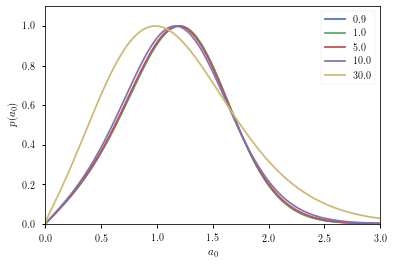

In [52]:
a0 = np.linspace(0.0001, 3, 200)
for s in [sigma_a_odot/a_odot, 0.01, 0.05, 0.10, 0.30]:
    # pdf_a0_simple = pdf_a0(a0, [mu0_simple, mu0_deriv_simple], *args)
    args = [a_odot, s*a_odot, *mu0_fit]
    pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
    # plt.plot(a0, pdf_a0_simple/pdf_a0_simple.max(), label='simple')
    plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label=f"{s*100:.01f}%")
plt.xlabel(r'$a_0$')
plt.ylabel(r'$p(a_0)$')
plt.xlim(0, 3)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

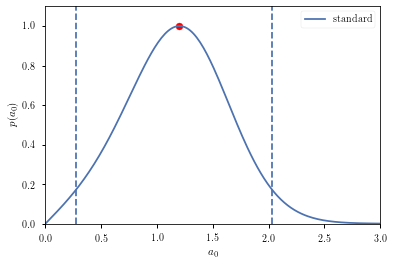

In [53]:


args = [a_odot, sigma_a_odot, *mu0_fit]

hpd, modes = hdi(lambda x: pdf_a0(x, mu0_standard_func, *args), low=0.000001, high=3, alpha=0.05)
low, high = hpd[0]
mode = modes[0]

a0 = np.linspace(0.0001, 3, 200)
pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label="standard")
plt.axvline(low, color='C0', ls='--')
plt.axvline(high, color='C0', ls='--')
plt.scatter([mode], [1], color='r')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$p(a_0)$')
plt.xlim(0, 3)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

## automate

In [54]:
def pdf_mu0(mu0, *mu0_fit):
    mu0 = np.atleast_1d(mu0)
    return skewnorm.pdf(mu0, *mu0_fit)

def pdf_x(x, mu_func, *mu0_fit):
    x = np.atleast_1d(x)
    mu0 = mu_func[0](x)
    val = pdf_mu0(mu0, *mu0_fit)*np.abs(mu_func[1](x))
    return val

def mu0_simple(x):
    return x/(1+x)
def mu0_deriv_simple(x):
    return 1/(1+x)**2

def mu0_standard(x):
    return x/np.sqrt(1+x**2)
def mu0_deriv_standard(x):
    return 1/np.power(1+x**2, 3/2)

mu0_simple_func = [mu0_simple, mu0_deriv_simple]
mu0_standard_func = [mu0_standard, mu0_deriv_standard]

a_odot = 2.24
sigma_a_odot = 0.02
a = np.linspace(a_odot-sigma_a_odot*5, a_odot+sigma_a_odot*5, 500)
def pdf_a(a, *a_odot):
    return norm.pdf(a, *a_odot)

def pdf_a0(a0, mu0_func, *args):
    odot = args[0:2]
    mu0_fit = args[2:]
    a = np.linspace(odot[0]-odot[1]*5, odot[0]+odot[1]*5, 500)
    a0 = np.atleast_1d(a0)
    A0, A = np.meshgrid(a0, a)
    integrand = pdf_a(A, *odot)*pdf_x(A/A0, mu0_func, *mu0_fit)*A/A0**2
    integral = simps(integrand, a, axis=0)
    area = simps(integral, a0)
    return integral/area

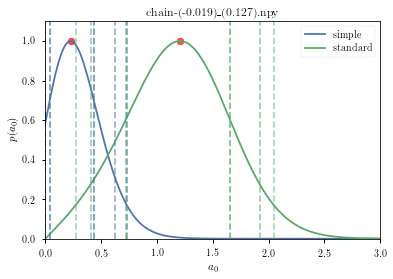

chain-(-0.019)_(0.127).npy
simple:
	 mode: 0.23
	 alpha: 0.32	 low: 0.04	 high: 0.44
	 alpha: 0.10	 low: 0.00	 high: 0.62
	 alpha: 0.05	 low: 0.00	 high: 0.72
standard:
	 mode: 1.21
	 alpha: 0.32	 low: 0.73	 high: 1.65
	 alpha: 0.10	 low: 0.41	 high: 1.92
	 alpha: 0.05	 low: 0.27	 high: 2.05


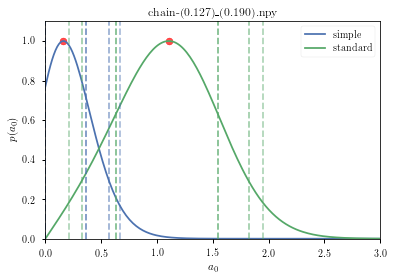

chain-(0.127)_(0.190).npy
simple:
	 mode: 0.16
	 alpha: 0.32	 low: 0.00	 high: 0.36
	 alpha: 0.10	 low: 0.00	 high: 0.57
	 alpha: 0.05	 low: 0.00	 high: 0.67
standard:
	 mode: 1.11
	 alpha: 0.32	 low: 0.63	 high: 1.55
	 alpha: 0.10	 low: 0.33	 high: 1.82
	 alpha: 0.05	 low: 0.21	 high: 1.95


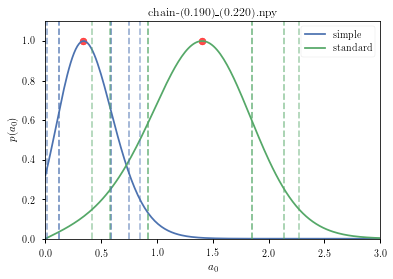

chain-(0.190)_(0.220).npy
simple:
	 mode: 0.34
	 alpha: 0.32	 low: 0.12	 high: 0.59
	 alpha: 0.10	 low: 0.01	 high: 0.75
	 alpha: 0.05	 low: 0.00	 high: 0.85
standard:
	 mode: 1.40
	 alpha: 0.32	 low: 0.92	 high: 1.85
	 alpha: 0.10	 low: 0.58	 high: 2.14
	 alpha: 0.05	 low: 0.42	 high: 2.27


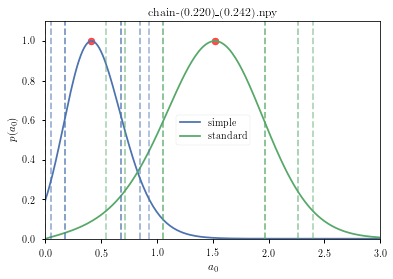

chain-(0.220)_(0.242).npy
simple:
	 mode: 0.41
	 alpha: 0.32	 low: 0.18	 high: 0.68
	 alpha: 0.10	 low: 0.05	 high: 0.85
	 alpha: 0.05	 low: 0.00	 high: 0.93
standard:
	 mode: 1.52
	 alpha: 0.32	 low: 1.05	 high: 1.97
	 alpha: 0.10	 low: 0.71	 high: 2.26
	 alpha: 0.05	 low: 0.54	 high: 2.40


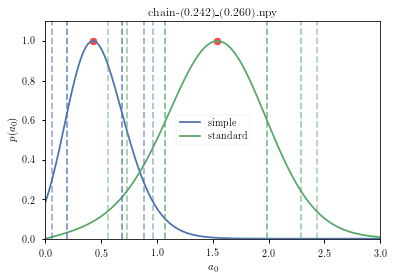

chain-(0.242)_(0.260).npy
simple:
	 mode: 0.43
	 alpha: 0.32	 low: 0.19	 high: 0.69
	 alpha: 0.10	 low: 0.06	 high: 0.88
	 alpha: 0.05	 low: 0.00	 high: 0.96
standard:
	 mode: 1.54
	 alpha: 0.32	 low: 1.07	 high: 1.99
	 alpha: 0.10	 low: 0.73	 high: 2.29
	 alpha: 0.05	 low: 0.56	 high: 2.43


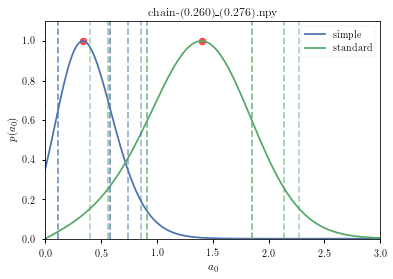

chain-(0.260)_(0.276).npy
simple:
	 mode: 0.34
	 alpha: 0.32	 low: 0.11	 high: 0.58
	 alpha: 0.10	 low: 0.00	 high: 0.74
	 alpha: 0.05	 low: 0.00	 high: 0.86
standard:
	 mode: 1.40
	 alpha: 0.32	 low: 0.91	 high: 1.85
	 alpha: 0.10	 low: 0.56	 high: 2.14
	 alpha: 0.05	 low: 0.40	 high: 2.27


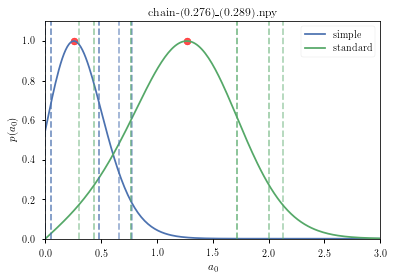

chain-(0.276)_(0.289).npy
simple:
	 mode: 0.26
	 alpha: 0.32	 low: 0.05	 high: 0.48
	 alpha: 0.10	 low: 0.00	 high: 0.66
	 alpha: 0.05	 low: 0.00	 high: 0.78
standard:
	 mode: 1.27
	 alpha: 0.32	 low: 0.77	 high: 1.72
	 alpha: 0.10	 low: 0.44	 high: 2.00
	 alpha: 0.05	 low: 0.30	 high: 2.13


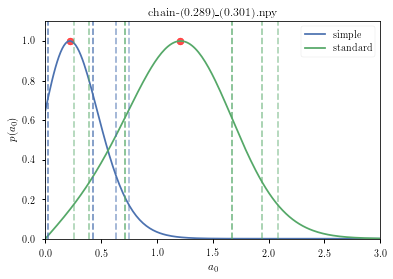

chain-(0.289)_(0.301).npy
simple:
	 mode: 0.22
	 alpha: 0.32	 low: 0.02	 high: 0.43
	 alpha: 0.10	 low: 0.00	 high: 0.63
	 alpha: 0.05	 low: 0.00	 high: 0.75
standard:
	 mode: 1.21
	 alpha: 0.32	 low: 0.71	 high: 1.67
	 alpha: 0.10	 low: 0.39	 high: 1.94
	 alpha: 0.05	 low: 0.26	 high: 2.08


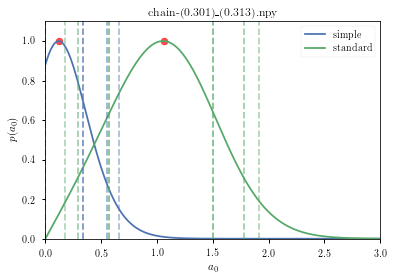

chain-(0.301)_(0.313).npy
simple:
	 mode: 0.12
	 alpha: 0.32	 low: 0.00	 high: 0.34
	 alpha: 0.10	 low: 0.00	 high: 0.55
	 alpha: 0.05	 low: 0.00	 high: 0.66
standard:
	 mode: 1.06
	 alpha: 0.32	 low: 0.57	 high: 1.50
	 alpha: 0.10	 low: 0.29	 high: 1.78
	 alpha: 0.05	 low: 0.18	 high: 1.91


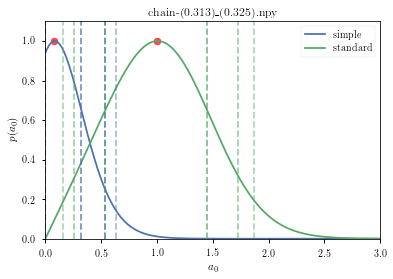

chain-(0.313)_(0.325).npy
simple:
	 mode: 0.08
	 alpha: 0.32	 low: 0.00	 high: 0.32
	 alpha: 0.10	 low: 0.00	 high: 0.53
	 alpha: 0.05	 low: 0.00	 high: 0.63
standard:
	 mode: 1.00
	 alpha: 0.32	 low: 0.53	 high: 1.45
	 alpha: 0.10	 low: 0.26	 high: 1.73
	 alpha: 0.05	 low: 0.16	 high: 1.87


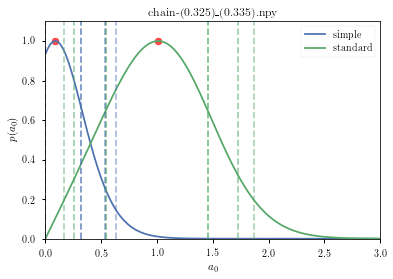

chain-(0.325)_(0.335).npy
simple:
	 mode: 0.09
	 alpha: 0.32	 low: 0.00	 high: 0.32
	 alpha: 0.10	 low: 0.00	 high: 0.53
	 alpha: 0.05	 low: 0.00	 high: 0.63
standard:
	 mode: 1.01
	 alpha: 0.32	 low: 0.54	 high: 1.46
	 alpha: 0.10	 low: 0.26	 high: 1.73
	 alpha: 0.05	 low: 0.17	 high: 1.87


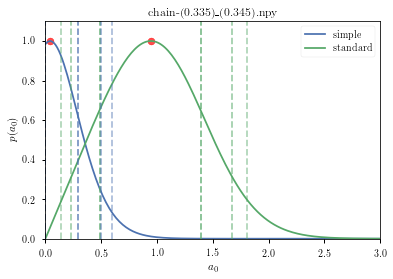

chain-(0.335)_(0.345).npy
simple:
	 mode: 0.04
	 alpha: 0.32	 low: 0.00	 high: 0.29
	 alpha: 0.10	 low: 0.00	 high: 0.50
	 alpha: 0.05	 low: 0.00	 high: 0.60
standard:
	 mode: 0.95
	 alpha: 0.32	 low: 0.49	 high: 1.39
	 alpha: 0.10	 low: 0.23	 high: 1.67
	 alpha: 0.05	 low: 0.14	 high: 1.81


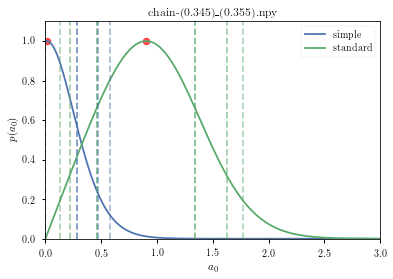

chain-(0.345)_(0.355).npy
simple:
	 mode: 0.01
	 alpha: 0.32	 low: 0.00	 high: 0.28
	 alpha: 0.10	 low: 0.00	 high: 0.47
	 alpha: 0.05	 low: 0.00	 high: 0.58
standard:
	 mode: 0.90
	 alpha: 0.32	 low: 0.46	 high: 1.34
	 alpha: 0.10	 low: 0.22	 high: 1.63
	 alpha: 0.05	 low: 0.13	 high: 1.77


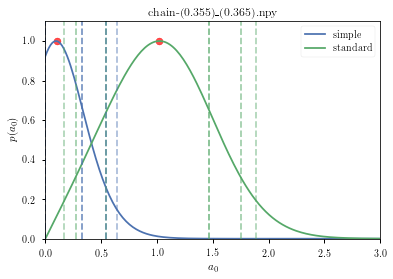

chain-(0.355)_(0.365).npy
simple:
	 mode: 0.10
	 alpha: 0.32	 low: 0.00	 high: 0.33
	 alpha: 0.10	 low: 0.00	 high: 0.54
	 alpha: 0.05	 low: 0.00	 high: 0.64
standard:
	 mode: 1.02
	 alpha: 0.32	 low: 0.54	 high: 1.47
	 alpha: 0.10	 low: 0.27	 high: 1.75
	 alpha: 0.05	 low: 0.17	 high: 1.89


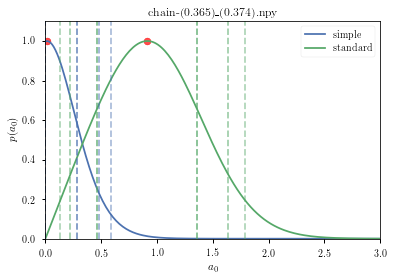

chain-(0.365)_(0.374).npy
simple:
	 mode: 0.01
	 alpha: 0.32	 low: 0.00	 high: 0.28
	 alpha: 0.10	 low: 0.00	 high: 0.48
	 alpha: 0.05	 low: 0.00	 high: 0.59
standard:
	 mode: 0.91
	 alpha: 0.32	 low: 0.46	 high: 1.36
	 alpha: 0.10	 low: 0.22	 high: 1.64
	 alpha: 0.05	 low: 0.13	 high: 1.79


In [55]:
simple_modes = []
simple_errs = []
standard_modes = []
standard_errs = []
mu0_fits = []
for file in files:
    df = np.load(file)
    name = file.split('/')[-1]
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    length = rhob.shape[0]
    rhob0 = np.empty((length, 12))
    for i in range(12):
        rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
    rhob0 = rhob0.sum(axis=1)/1E-2
    # fit
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = norm.fit(rhob_sample)
    rhob0_sample = np.random.choice(rhob0, size=10_000, replace=False)
    rhob0_fit = norm.fit(rhob0_sample)
    # mu0
    mu0 = np.linspace(0.5, 1.5, 1000)
    pdf_mu0_sample = np.sum(norm.pdf(mu0[:, None]*rho[None, :], *rhob0_fit)*norm.pdf(rho[None, :], *rhob_fit)*rho[None, :], axis=1)
    area = np.trapz(pdf_mu0_sample, mu0)
    pdf_mu0_sample /= area

    mu0_fit, _ = curve_fit(skewnorm.pdf, mu0, pdf_mu0_sample, p0=[1, 1.0, 0.1])
    mu0_fits.append(mu0_fit)
    # a0
    sigmas = np.array([0.68, 0.9, 0.95])
    alphas = 1 - sigmas
    args = [a_odot, sigma_a_odot, *mu0_fit]
    a0 = np.linspace(0.0001, 3, 200)

    pdf_a0_simple = pdf_a0(a0, mu0_simple_func, *args)
    pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
    plt.plot(a0, pdf_a0_simple/pdf_a0_simple.max(), c='C0', label='simple')
    plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), c='C1', label="standard")
    simple_mode = None
    standard_mode = None
    simple_err = []
    standard_err = []
    for alpha in alphas:
        # simple
        hpd, modes = hdi(lambda x: pdf_a0(x, mu0_simple_func, *args), low=0.000001, high=1.5, alpha=alpha)
        low, high = hpd[0]
        simple_err.append({'alpha': alpha, 'low': low, 'high': high})
        mode = modes[0]
        simple_mode = mode
        plt.axvline(low, color='C0', ls='--', alpha=alpha**(1/4))
        plt.axvline(high, color='C0', ls='--', alpha=alpha**(1/4))
        plt.scatter([mode], [1], color='r', alpha=0.33)
        # standard
        hpd, modes = hdi(lambda x: pdf_a0(x, mu0_standard_func, *args), low=0.000001, high=3, alpha=alpha)
        low, high = hpd[0]
        standard_err.append({'alpha': alpha, 'low': low, 'high': high})
        mode = modes[0]
        standard_mode = mode
        plt.axvline(low, color='C1', ls='--', alpha=alpha**(1/4))
        plt.axvline(high, color='C1', ls='--', alpha=alpha**(1/4))
        plt.scatter([mode], [1], color='r', alpha=0.33)
    simple_modes.append(simple_mode)
    simple_errs.append(simple_err)
    standard_modes.append(standard_mode)
    standard_errs.append(standard_err)

    plt.xlabel(r'$a_0$')
    plt.ylabel(r'$p(a_0)$')
    plt.xlim(0, 3)
    plt.ylim(0, 1.1)
    plt.legend()
    plt.title(name)
    plt.show()
    print(name)
    print(f"simple:")
    print(f"\t mode: {simple_mode:.02f}")
    for i in range(3):
        print(f"\t alpha: {simple_err[i]['alpha']:.02f}\t low: {simple_err[i]['low']:.02f}\t high: {simple_err[i]['high']:.02f}")
    print(f"standard:")
    print(f"\t mode: {standard_mode:.02f}")
    for i in range(3):
        print(f"\t alpha: {standard_err[i]['alpha']:.02f}\t low: {standard_err[i]['low']:.02f}\t high: {standard_err[i]['high']:.02f}")
    print("====================================================================")
    # break



In [56]:
simple_modes = np.array(simple_modes)
simple_errs = np.array(simple_errs)
standard_modes = np.array(standard_modes)
standard_errs = np.array(standard_errs)
mu0_fits =  np.array(mu0_fits)

(0.0, 2.0)

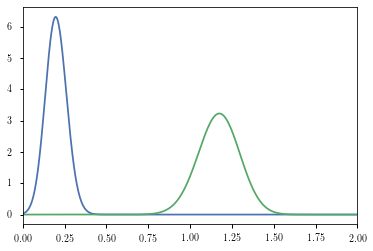

In [57]:
# combined a0
a0s = np.linspace(0.00001, 3, 1000)
a0_simple_com = None
a0_standard_com = None
for mu0_fit in mu0_fits:
    args = [a_odot, sigma_a_odot, *mu0_fit]
    if a0_simple_com is None:
        a0_simple_com = pdf_a0(a0s, mu0_simple_func, *args)
    else:
        a0_simple_com *= pdf_a0(a0s, mu0_simple_func, *args)
    if a0_standard_com is None:
        a0_standard_com = pdf_a0(a0s, mu0_standard_func, *args)
    else:
        a0_standard_com *= pdf_a0(a0s, mu0_standard_func, *args)
# find area
area = simps(a0_simple_com, a0s)
a0_simple_com /= area
area = simps(a0_standard_com, a0s)
a0_standard_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(a0s, a0_simple_com, label='simple')
ax.plot(a0s, a0_standard_com, label='standard')
ax.set_xlim(0,2)


In [58]:
from scipy.optimize import curve_fit

a0_simple_com_fit, _ = curve_fit(skewnorm.pdf, a0s, a0_simple_com, p0=[1, 1.0, 2.0])
a0_standard_com_fit, _ = curve_fit(skewnorm.pdf, a0s, a0_standard_com, p0=[1, 1.0, 2.0])
a0_simple_com_fit, a0_standard_com_fit

(array([0.83445261, 0.16237407, 0.07385716]),
 array([-0.72799762,  1.23655465,  0.14047341]))

(0.0, 2.0)

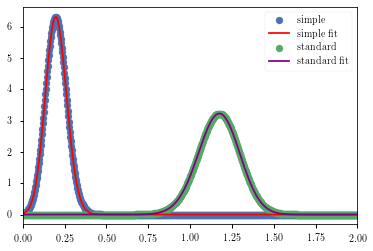

In [59]:
plt.scatter(a0s, a0_simple_com, label='simple')
plt.plot(a0s, skewnorm.pdf(a0s, *a0_simple_com_fit), c='r', label='simple fit')
plt.scatter(a0s, a0_standard_com, label='standard')
plt.plot(a0s, skewnorm.pdf(a0s, *a0_standard_com_fit), c='purple', label='standard fit')
plt.legend()
plt.xlim(0,2)

In [60]:
a0_simple_com_errs = []
a0_standard_com_errs = []
a0_simple_com_mode = 0
a0_standard_com_mode = 0
for i, alpha in enumerate(alphas):
    hpd, modes = hdi(lambda x: skewnorm.pdf(x, *a0_simple_com_fit), -0.5, 5., alpha=alpha, res=10_000)
    low, high = hpd[0]
    a0_simple_com_mode = modes[0]
    a0_simple_com_errs.append({'alpha': alpha, 'low': low, 'high': high})
    hpd, modes = hdi(lambda x: skewnorm.pdf(x, *a0_standard_com_fit), -0.5, 5., alpha=alpha, res=10_000)
    low, high = hpd[0]
    a0_standard_com_mode = modes[0]
    a0_standard_com_errs.append({'alpha': alpha, 'low': low, 'high': high})

In [61]:
a0_simple_com_mode, a0_simple_com_errs

(0.2,
 [{'alpha': 0.31999999999999995, 'low': 0.14, 'high': 0.26},
  {'alpha': 0.09999999999999998, 'low': 0.1, 'high': 0.3},
  {'alpha': 0.050000000000000044, 'low': 0.08, 'high': 0.33}])

In [62]:
a0_standard_com_mode, a0_standard_com_errs

(1.17,
 [{'alpha': 0.31999999999999995, 'low': 1.05, 'high': 1.3},
  {'alpha': 0.09999999999999998, 'low': 0.97, 'high': 1.37},
  {'alpha': 0.050000000000000044, 'low': 0.93, 'high': 1.41}])

In [63]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

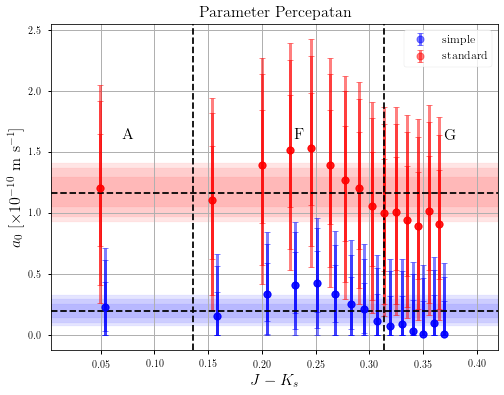

In [64]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)
dc = c2-c1

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    low = np.array([arr[i]['low'] for arr in simple_errs])
    high = np.array([arr[i]['high'] for arr in simple_errs])  
    simple_ax = ax.errorbar(c, simple_modes, yerr=[simple_modes-low, high-simple_modes], fmt='o', 
                        color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([arr[i]['low'] for arr in standard_errs])
    high = np.array([arr[i]['high'] for arr in standard_errs])  
    standard_ax = ax.errorbar(c-0.005, standard_modes, yerr=[standard_modes-low, high-standard_modes], fmt='o', 
                        color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    
    ax.fill_between(cs, a0_simple_com_errs[i]['low'], a0_simple_com_errs[i]['high'], color='blue', alpha=0.1)
    ax.fill_between(cs, a0_standard_com_errs[i]['low'], a0_standard_com_errs[i]['high'], color='red', alpha=0.1)
    if i == 2:
        ax.legend([simple_ax, standard_ax], 
                  ['simple', 'standard'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=a0_simple_com_mode, color='black', linestyle='--')
ax.axhline(y=a0_standard_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$a_0$ [$\times 10^{-10}$ m s$^{-1}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Parameter Percepatan", fontsize=16)
ax.text(0.07, 1.6, r'$\textup{A}$', fontsize=16)
ax.text(0.23, 1.6, r'$\textup{F}$', fontsize=16)
ax.text(0.37, 1.6, r'$\textup{G}$', fontsize=16)
ax.grid()
fig.savefig(join('img', 'a0.pdf'), dpi=70)
plt.show()